# Comparison Example : scores

In this jupyter notebook we present the implementation of the grid score as defined by. 
The scores workas follows 

We aim to implement a larger variety of score over time.

In [1]:
import sys
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from neuralplayground.arenas import Wernle2018, MergingRoom, Sargolini2006, Simple2D, BasicSargolini2006,Hafting2008
from neuralplayground.agents import Weber2018, Stachenfeld2018, RandomAgent, LevyFlightAgent
from neuralplayground.experiments import Wernle2018Data, Hafting2008Data, Sargolini2006Data
from neuralplayground.comparison import GridScorer


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Experimental results 


GridScorer_Sargo
-0.38432106696526847


/Users/clementine/miniconda3/envs/NPG/lib/python3.11/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float64
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


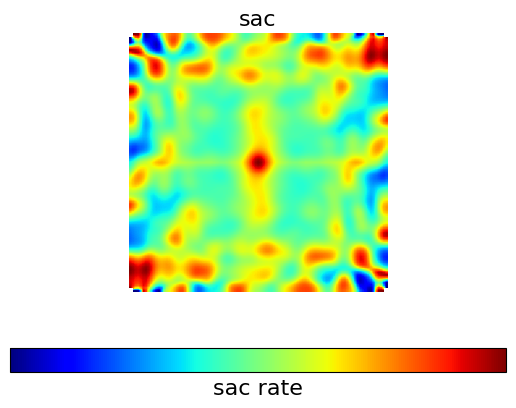

In [3]:
sargolini_data = Sargolini2006Data(verbose=False)
data_path = data_path = "../../neuralplayground/experiments/sargolini_2006/"
env = BasicSargolini2006(data_path=data_path,
                         time_step_size=1,
                         agent_step_size=None)
score = sargolini_data.get_grid_score(plot=True)
print('GridScorer_Sargo')
print(score['gridscore'])


0.00983758634760581


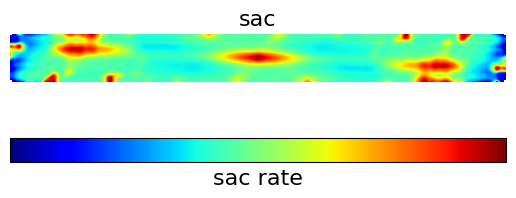

In [4]:
hafting_data = Hafting2008Data(verbose=False)
data_path = data_path = "../../neuralplayground/experiments/hafting_2008/"
env = Hafting2008(data_path=data_path,
                         time_step_size=1,
                         agent_step_size=None)
score = hafting_data.get_grid_score(plot=True)
print(score['gridscore'])

GridScorer_SR
0.005638637247026214


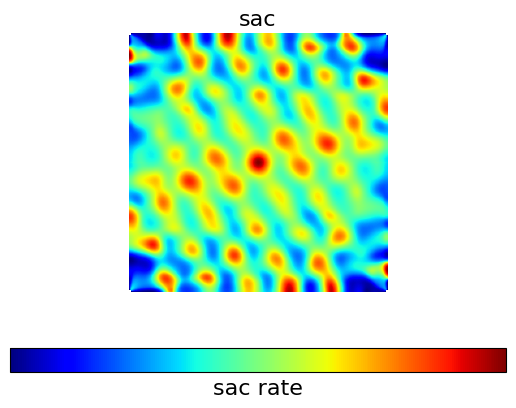

In [12]:
wernle_data =  Wernle2018Data()
data_path = data_path = "../../neuralplayground/experiments/wernle_2018/"
score = wernle_data.get_grid_score(plot=True)
print('GridScorer_SR')
print(score['gridscore'])

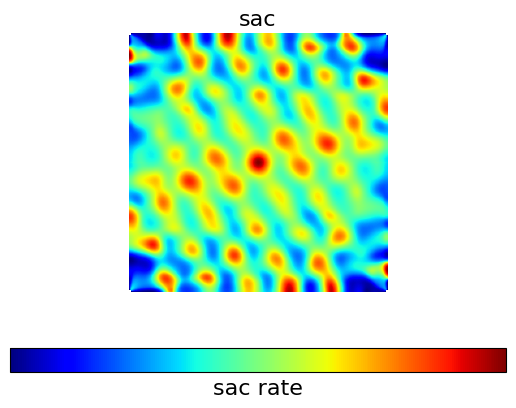

In [16]:
wernle_data =  Wernle2018Data()
data_path = data_path = "../../neuralplayground/experiments/wernle_2018/"
h, x_bin, y_bin = wernle_data.recording_tetr()
r_out_im = h.reshape((x_bin.size, y_bin.size))
GridScorer_Wernle = GridScorer(x_bin.size-1)
score_Wernle = GridScorer_Wernle.get_scores(r_out_im)
GridScorer_Wernle.plot_sac(score_Wernle[0])


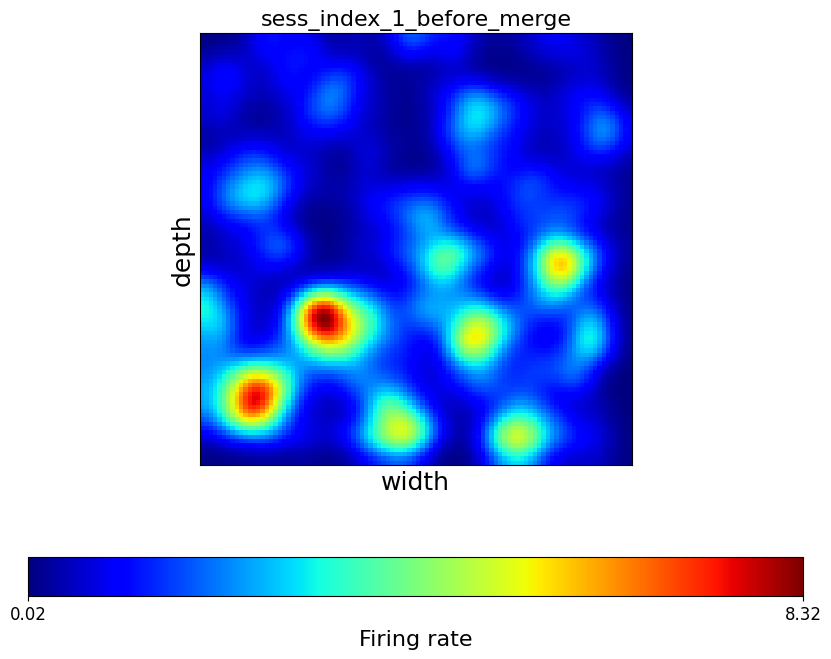

In [18]:
env = Wernle2018(data_path=data_path,
                         time_step_size=1,
                         agent_step_size=None)
ax = env.plot_recording_tetr(recording_index=40)

In [17]:
print('GridScorer_SR')
print(score_Wernle[1])

GridScorer_SR
{'gridscore': 0.005638637247026214, 'scale': 30.528675044947494, 'orientation': -0.0, 'closest_peak_coords': array([[117,  80],
       [ 81, 118],
       [ 73,  83],
       [125, 115],
       [ 96,  66],
       [102, 132]]), 'dist_to_centre': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'ellipse_axes': (47.063558789904725, 32.68608399635522), 'ellipse_angle': 0.8102254158874589, 'ellipseXY': array([[ 32.44256534,  34.09484595],
       [ 29.14818459,  36.69621331],
       [ 25.37519145,  38.69502986],
       [ 21.18553837,  40.05847509],
       [ 16.64801934,  40.76416127],
       [ 11.83714029,  40.80050104],
       [  6.83189572,  40.16689772],
       [  1.71447162,  38.8

## Agents results 

###  Env

In [ ]:
# Parameters for a square environment
room_width = [-10,10]
room_depth = [-10,10]
env_name = "env_example"
time_step_size = 1
agent_step_size = 0.5

# Init environment
envsimple = Simple2D(arena_x_limits = room_width,
                     arena_y_limits = room_depth,
                     time_step_size = time_step_size,
                     agent_step_size = agent_step_size)


In [ ]:

exc_eta = 2e-4
inh_eta = 8e-4
model_name = "model_example"
sigma_exc = np.array([0.05, 0.05])
sigma_inh = np.array([0.1, 0.1])
Ne = 4900
Ni = 1225
Nef = 1
Nif = 1
alpha_i = 1
alpha_e = 1
we_init = 1.0
wi_init = 1.5
agent_step_size = 0.1
roh = 1
agent_Webber = Weber2018(model_name=model_name, exc_eta=exc_eta, inh_eta=inh_eta, sigma_exc=sigma_exc,
                  sigma_inh=sigma_inh, Ne=Ne, Ni=Ni, agent_step_size=agent_step_size, ro=roh,
                  Nef=Nef, Nif=Nif, room_width=envsimple.room_width, room_depth=envsimple.room_depth,
                  alpha_i=alpha_i, alpha_e=alpha_e, we_init=we_init, wi_init=wi_init)

plot_every = 100000  
total_iters = 0
n_steps = 40
obs, state = envsimple.reset()
for i in tqdm(range(n_steps)):
    # Observe to choose an action, the first to numbers in the observation are the xy position of the agent
    obs = obs[:2]
    action = agent_Webber.act(obs)
    # rate = agent.update()
    agent_Webber.update()
    # Run environment for given action
    obs, state, reward = envsimple.step(action, normalize_step=True)
    total_iters += 1
    if i % plot_every == 0:
        agent_Webber.plot_rate_map()


In [ ]:
print('GridScorer_Webber')
score = agent_Webber.get_grid_score(plot=True)
print(score['gridscore'])

In [ ]:
agent_step_size = 1
discount = .9
threshold = 1e-6
lr_td = 1e-2
t_episode = 10000
n_episode = 10000
state_density = (1 / agent_step_size)
twoDvalue = True

agent_SR = Stachenfeld2018(discount=discount, t_episode=t_episode, n_episode=n_episode, threshold=threshold, lr_td=lr_td,
               room_width=envsimple.room_width, room_depth=envsimple.room_depth, state_density=state_density, twoD=twoDvalue)

print('GridScorer_SR')
score = agent_SR.get_grid_score(plot=True)
print(score)